<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/PCA_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA on titanic dataset.

Import libraries

In [72]:
import pandas as pd
import io
from google.colab import files
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [7]:
uploaded = files.upload()

Saving iris.data to iris.data


In [11]:
iris_data = pd.read_csv('iris.data')

cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris_data.columns = cols

iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [15]:

#relevent features
rel_feat = iris_data.columns[:-1]

iris_data[rel_feat].describe().T


,count,mean,std,min,25%,50%,75%,max
sepal length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
sepal width,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
petal length,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
petal width,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5


### BoxPlots

<Axes: >

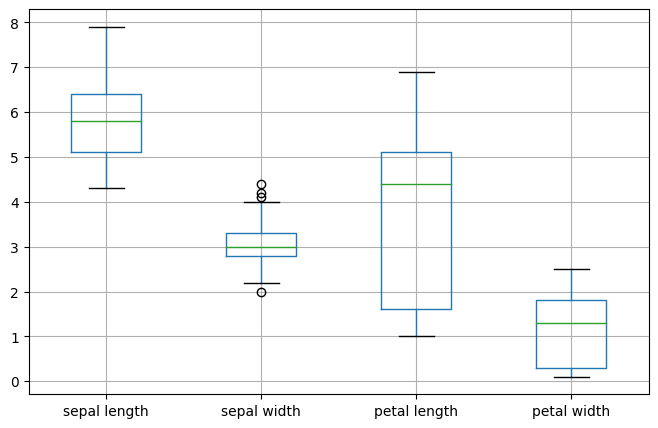

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
iris_data[rel_feat].boxplot()

<Axes: title={'center': 'sepal length'}, xlabel='class'>

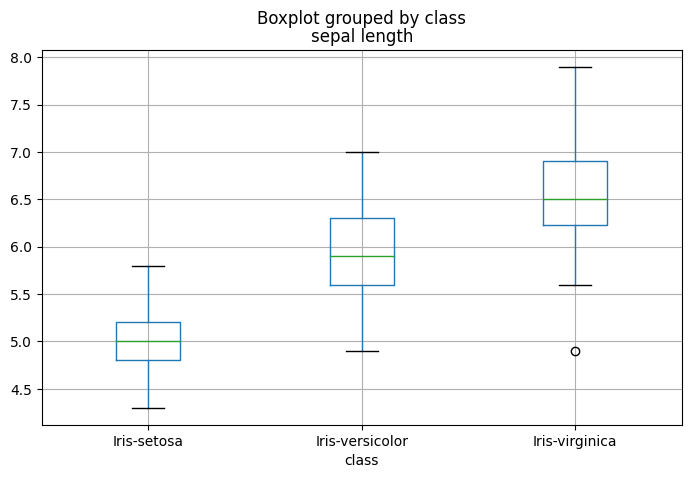

In [20]:
# Plots of features wrt class
iris_data.boxplot(column='sepal length', by='class', figsize=(8, 5))

<Axes: title={'center': 'sepal width'}, xlabel='class'>

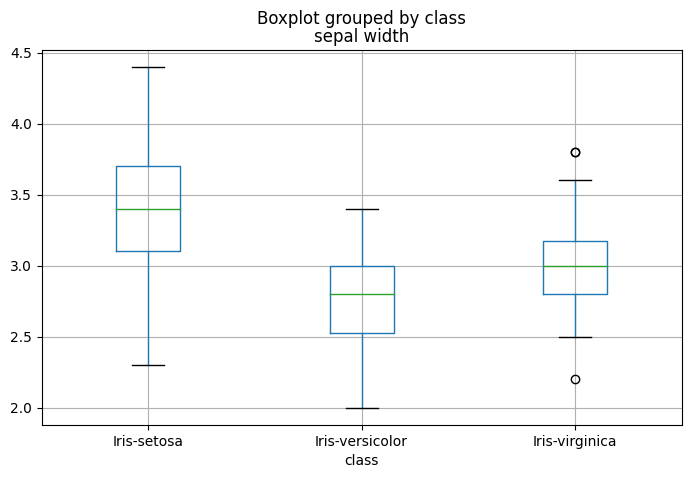

In [22]:
iris_data.boxplot(column='sepal width', by='class', figsize=(8, 5))

<Axes: title={'center': 'petal length'}, xlabel='class'>

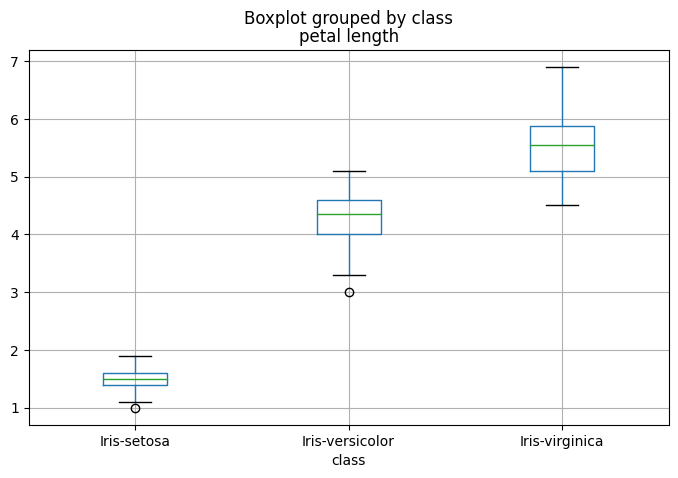

In [23]:
iris_data.boxplot(column='petal length', by='class', figsize=(8, 5))

<Axes: title={'center': 'petal width'}, xlabel='class'>

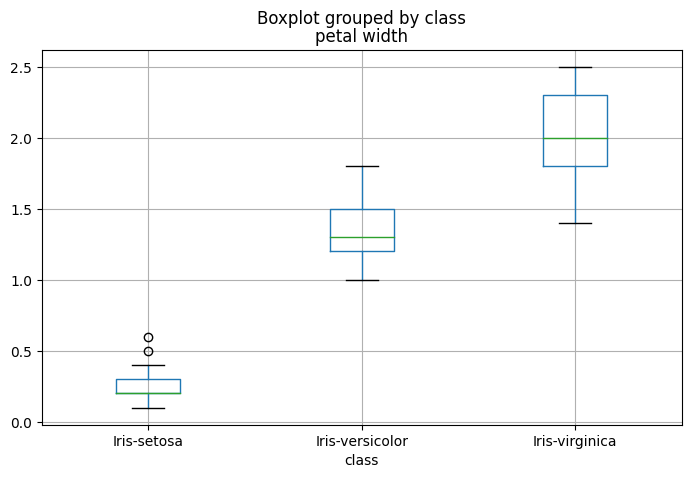

In [24]:
iris_data.boxplot(column='petal width', by='class', figsize=(8, 5))

### Histograms

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>,
        <Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>, <Axes: >]], dtype=object)

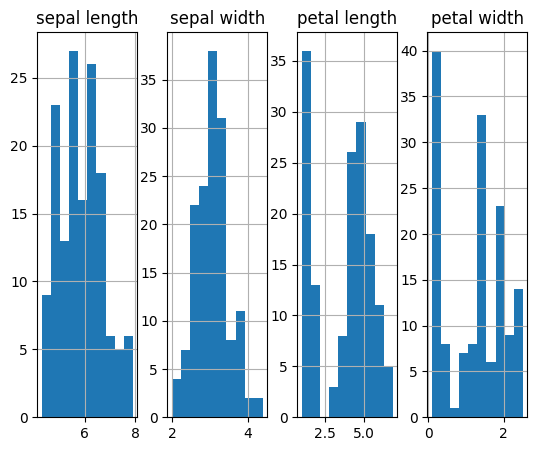

In [25]:
iris_data[rel_feat].hist(figsize=(8, 5), layout=(1, 5))

<Axes: xlabel='sepal length', ylabel='Count'>

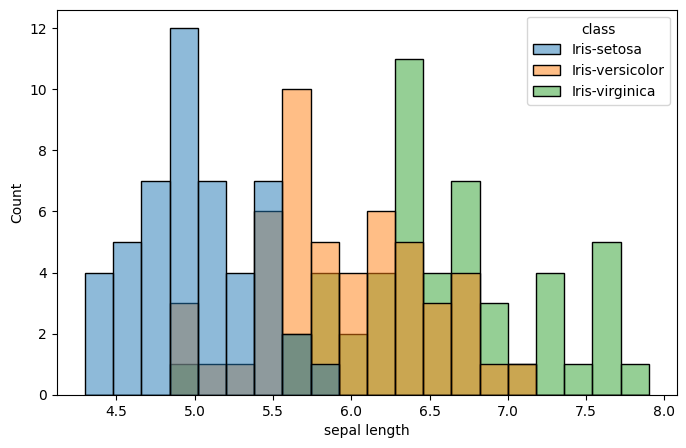

In [28]:
# Histogram wrt class
plt.figure(figsize=(8, 5))
sns.histplot(iris_data, x='sepal length', hue='class', bins=20)

### Pairplots

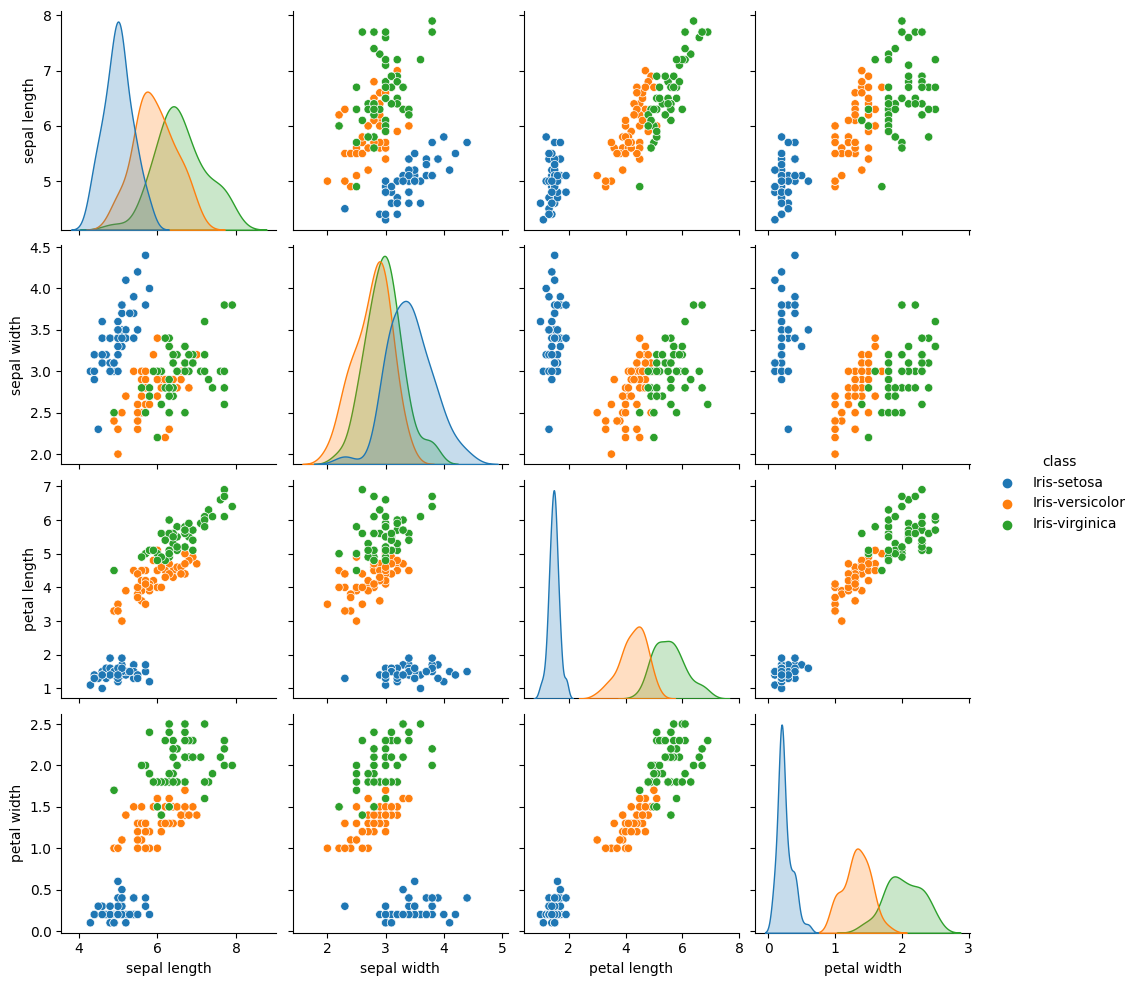

In [32]:
sns.pairplot(iris_data, hue='class')

## Applying PCA for better visualization

In [45]:
#standardize the data first so that mean for every feature is 0 and SD is 1. This helps in faster ML performance & a standard scale for every feature
copy_data = iris_data.copy()
iris_standardized = copy_data
iris_standardized[rel_feat] = StandardScaler().fit_transform(copy_data[rel_feat])

iris_standardized.head()

,sepal length,sepal width,petal length,petal width,class
0,-1.148356,-0.118060,-1.353964,-1.325063,Iris-setosa
1,-1.390542,0.344859,-1.410986,-1.325063,Iris-setosa
2,-1.511636,0.113399,-1.296943,-1.325063,Iris-setosa
3,-1.027262,1.270695,-1.353964,-1.325063,Iris-setosa
4,-0.542889,1.965072,-1.182901,-1.061466,Iris-setosa


In [46]:
iris_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,149.0,2.384372e-16,1.003373,-1.874916,-0.906169,-0.058515,0.668045,2.484446
sepal width,149.0,2.384372e-17,1.003373,-2.432651,-0.580978,-0.118060,0.576318,3.122368
petal length,149.0,-9.537486e-17,1.003373,-1.582049,-1.239922,0.356669,0.755817,1.782197
petal width,149.0,-1.430623e-16,1.003373,-1.456862,-1.193264,0.124722,0.783716,1.706306


## Perfoming PCA on standardized data

In [59]:
myPCA = PCA().fit(iris_standardized[rel_feat])

# Components
components = myPCA.components_

# Getting a vector of the variance explained by each of the selected component
explained_var_ratio = myPCA.explained_variance_ratio_
# Getting a vector of the variance explained by (i + 1) components
explained_var_ratio_cumsum = myPCA.explained_variance_ratio_.cumsum()

print(components)
print(explained_var_ratio)
print(explained_var_ratio_cumsum)

[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  0.2411952   0.13962963  0.63380158]
 [-0.26301409  0.12437342  0.80099722 -0.52321917]]
[0.72620033 0.23147407 0.03711516 0.00521044]
[0.72620033 0.9576744  0.99478956 1.        ]


### Scree plot to understand number of components to keep


Text(0.5, 1.0, 'Percentage variance explained by each component')

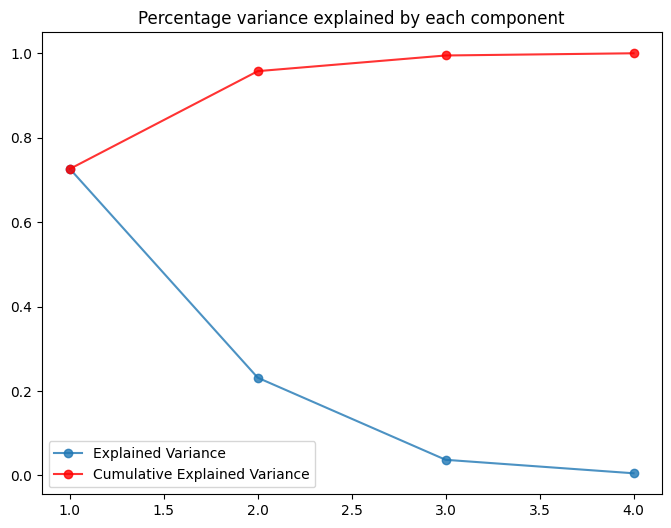

In [58]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.8, marker='o', label="Explained Variance")
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio_cumsum, c='r', alpha=0.8, marker='o', label='Cumulative Explained Variance')
y_label = 'Explained Variance'
x_label = 'Coponents'
plt.legend()
plt.title('Percentage variance explained by each component')

### Weight assigned to dimensions while decompositioning into components

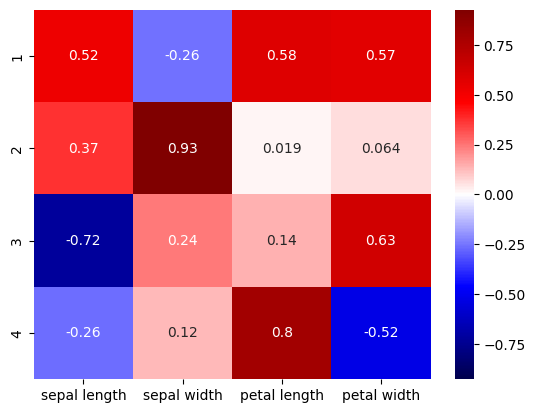

In [64]:
ax = sns.heatmap(components, cmap='seismic', xticklabels=rel_feat,
                 vmin=-np.max(np.abs(components)), vmax=np.max(np.abs(components)), annot=True)

# Adjusting y-axis ticks and labels to start from 1 and end at 4
ax.set_yticks(np.arange(0.5, 4.5, 1))
ax.set_yticklabels(np.arange(1, 5, 1))

plt.show()

## Using PCA to apply transformation and visualization

In [69]:
transformed = myPCA.transform(iris_standardized[rel_feat])
iris_standardized[['PC1', 'PC2', 'PC3']] = transformed[:, :3]

iris_standardized.head()

,sepal length,sepal width,petal length,petal width,class,PC1,PC2,PC3
0,-1.148356,-0.118060,-1.353964,-1.325063,Iris-setosa,-2.107950,-0.644276,-0.228768
1,-1.390542,0.344859,-1.410986,-1.325063,Iris-setosa,-2.387971,-0.305833,0.049672
2,-1.511636,0.113399,-1.296943,-1.325063,Iris-setosa,-2.324879,-0.562923,0.097142
3,-1.027262,1.270695,-1.353964,-1.325063,Iris-setosa,-2.405086,0.687591,0.018819
4,-0.542889,1.965072,-1.182901,-1.061466,Iris-setosa,-2.083204,1.530252,0.027757


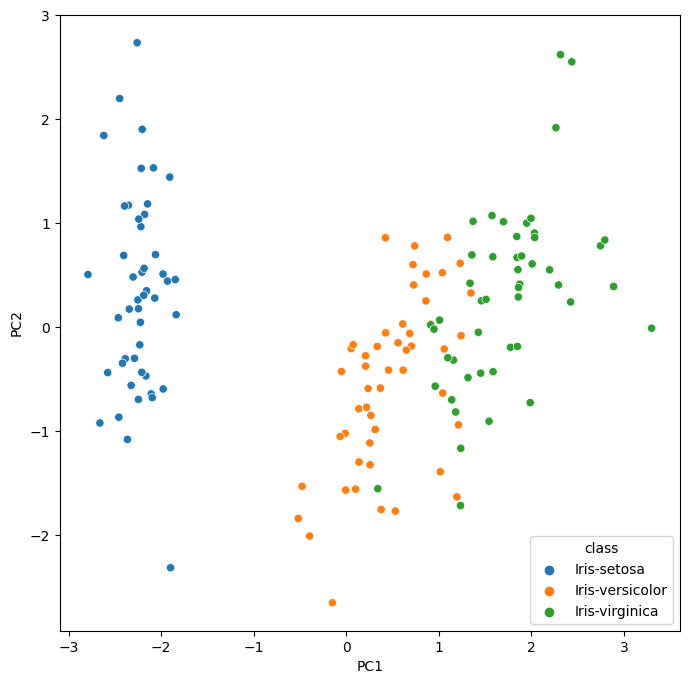

In [70]:
fig = plt.figure(figsize=(8, 8))
_ = sns.scatterplot(x = 'PC1', y = 'PC2', hue='class', data=iris_standardized)

In [73]:
fig = px.scatter_3d(iris_standardized, x='PC1', y='PC2', z='PC3', color='class')
fig.show()